Task 1: TITANIC SURVIVAL PREDICTION

• Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.


• The dataset typically used for this project contains information about
individual passengers, such as their age, gender, ticket class, fare, cabin,
and whether or not they survived.


DATASET - [CLICK HERE](https://www.kaggle.com/datasets/yasserh/titanic-dataset?resource=download)

In [1]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')

In [2]:
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.groupby('Sex')['Age'].mean().reset_index()

,Sex,Age
0,female,27.915709
1,male,30.726645


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [9]:
from sklearn.preprocessing import MinMaxScaler
df[['Fare', 'Age']] = MinMaxScaler().fit_transform(df[['Fare', 'Age']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,NaN,S


In [10]:
df.drop(columns=['Cabin','PassengerId','Name','Ticket','Sex', 'Embarked'],inplace=True)

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

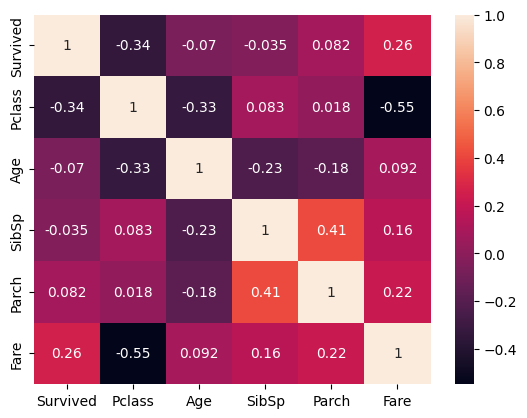

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(), annot = True)
plt.show()

In [13]:
Survived = df['Survived'].value_counts().reset_index()
Survived

,Survived,count
0,0,549
1,1,342


In [14]:
X = df.drop(columns='Survived',axis=1)
Y = df['Survived']

In [15]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,0.271174,1,0,0.014151
1,1,0.472229,1,0,0.139136
2,3,0.321438,0,0,0.015469
3,1,0.434531,1,0,0.103644
4,3,0.434531,0,0,0.015713


In [16]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

def compare_models(models, X_train, x_test, Y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, Y_train)
        score = model.score(x_test, y_test)
        print(f"Model: {name}")
        print(f"Score: {score}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, model.predict(x_test))}")
        print(f"Classification Report:\n{classification_report(y_test, model.predict(x_test))}")
        print()

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC(),
}

compare_models(models, X_train, x_test, Y_train, y_test)

Model: Logistic Regression
Score: 0.6983240223463687
Confusion Matrix:
[[96 14]
 [40 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       110
           1       0.67      0.42      0.52        69

    accuracy                           0.70       179
   macro avg       0.69      0.65      0.65       179
weighted avg       0.69      0.70      0.68       179


Model: Decision Tree
Score: 0.6536312849162011
Confusion Matrix:
[[81 29]
 [33 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       110
           1       0.55      0.52      0.54        69

    accuracy                           0.65       179
   macro avg       0.63      0.63      0.63       179
weighted avg       0.65      0.65      0.65       179


Model: Random Forest
Score: 0.7262569832402235
Confusion Matrix:
[[95 15]
 [34 35]]
Classification Report:
              pre

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid_GBC_reduced = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

GBC = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_GBC_reduced, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
GBC.fit(X_train, Y_train)

best_params_GBC = GBC.best_params_
best_score_GBC = GBC.best_score_

print("Best Parameters:", best_params_GBC)
print("Best Score:", best_score_GBC)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7176302570668767


In [21]:
best_models = {'Gradient Boosting': GradientBoostingClassifier(**best_params_GBC)}
tuned_results = compare_models(best_models, X_train, x_test, Y_train, y_test)

Model: Gradient Boosting
Score: 0.6927374301675978
Confusion Matrix:
[[98 12]
 [43 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       110
           1       0.68      0.38      0.49        69

    accuracy                           0.69       179
   macro avg       0.69      0.63      0.63       179
weighted avg       0.69      0.69      0.67       179


